# PAA - Ordenação

## Setup

In [130]:
%pip install -r requirements.txt
!sudo apt install make

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 55.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 53.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 56.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 17.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Importação

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil

## Criação dos valores a serem ordenados

In [132]:
qtd_values = [200_000, 400_000, 600_000]
dados = {
  'Ordem_crescente': [np.arange(1, qtd + 1) for qtd in qtd_values],
  'Ordem_decrescente': [np.arange(qtd, 0, -1) for qtd in qtd_values],
  'Ordem_aleatoria_pemutation': [np.random.permutation(qtd) for qtd in qtd_values]
}

### Exibindo amostragem


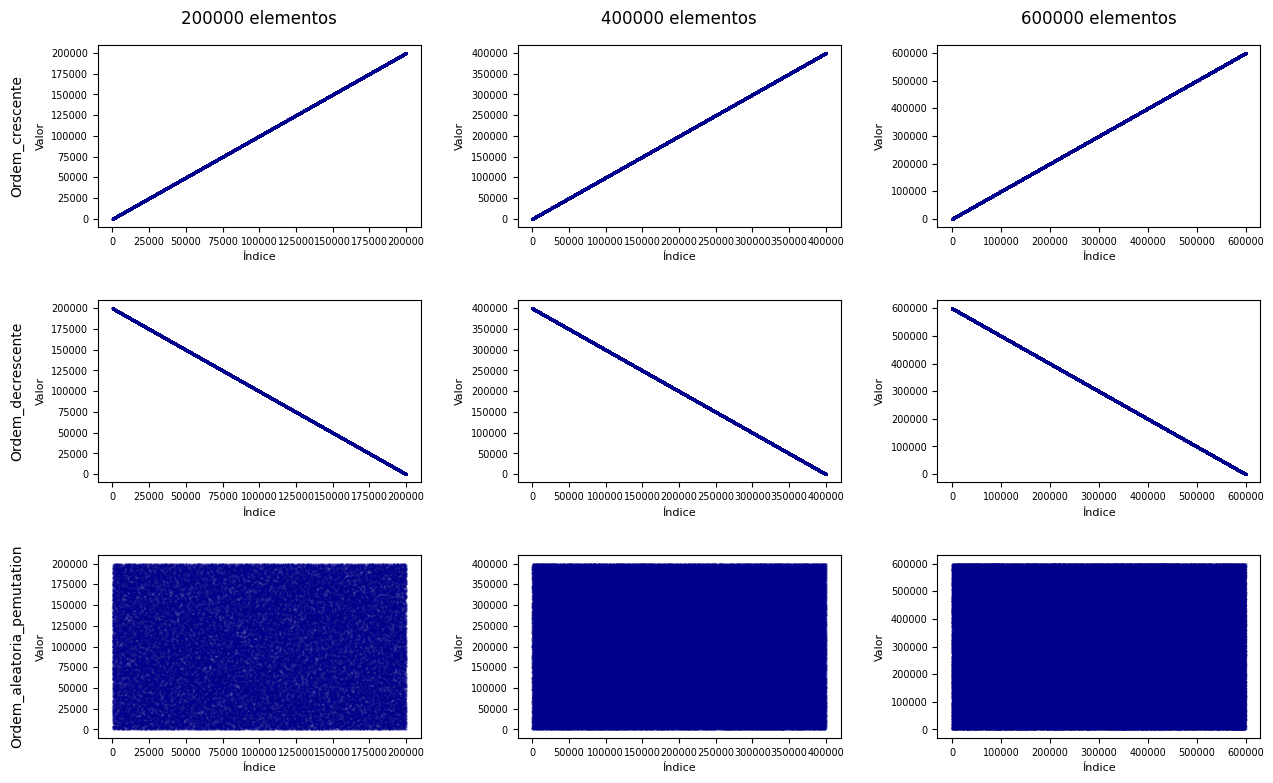

In [133]:
n_rows = len(dados)
n_cols = len(qtd_values)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5*n_cols, 3*n_rows))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for ax, qtd in zip(axs[0] if n_rows > 1 else axs, qtd_values):
    ax.set_title(f'{qtd} elementos', pad=15)

for row_idx, (ordem, valores) in enumerate(dados.items()):
    for col_idx, arr in enumerate(valores):
        ax = axs[row_idx, col_idx] if n_rows > 1 else axs[col_idx]
        x = np.arange(len(arr))
        ax.scatter(x, arr, s=0.1, alpha=0.3, color='darkblue')
        ax.set_xlabel('Índice', fontsize=8)
        ax.set_ylabel('Valor', fontsize=8)
        ax.tick_params(axis='both', labelsize=7)

    if n_rows > 1:
        axs[row_idx, 0].annotate(
            ordem,
            xy=(-0.25 if n_cols <=3 else -0.35, 0.5),
            xycoords='axes fraction',
            rotation=90,
            fontsize=10,
            ha='center',
            va='center'
        )
    else:
        axs[0].annotate(
            ordem,
            xy=(-0.25 if n_cols <=3 else -0.35, 0.5),
            xycoords='axes fraction',
            rotation=90,
            fontsize=10,
            ha='center',
            va='center'
        )

plt.show()

### Salvando amostragem em txt

In [134]:
paths = []

shutil.rmtree('files', ignore_errors=True)
os.makedirs('files', exist_ok=True)

for title, values in dados.items():
    for i, value in enumerate(values):
        path = f'files/{title}/{len(value)}.csv'
        paths.append(path)
        
        os.makedirs(os.path.dirname(path), exist_ok=True)
        
        df = pd.DataFrame(value)
        df.to_csv(path, index=False, header=False)
        
print(f'Arquivos salvos em {os.path.abspath("files")}')

Arquivos salvos em /home/jonascgn/Trabalhos/Trabalho-1---PAA/files


## Block Sorting

O tipo de bloco é um algoritmo de classificação que classifica um array dividindo-o em blocos de tamanho fixo, classificando cada bloco individualmente e, em seguida, mesclando os blocos classificados de volta em uma única matriz ordenada. O Block sort é uma boa opção para classificar grandes conjuntos de dados que não cabem na memória. Ele pode classificar eficientemente os dados em blocos que se encaixam na memória e, em seguida, mesclar os blocos classificados juntos para obter a matriz ordenada final.



### Executando o algoritmo para cada amostragem



In [ ]:
%%capture results_block_sort
args = f""
results = {}

for path in paths:
    block_size = int(path.split('/')[-1].split('.')[0])
    
    args_copy = f"""FILE_PATH={path} SIZE_ARR={path.split('/')[-1].split('.')[0]} BLOCK_SIZE={block_size / 4} SHOW_VECTOR_RESULT=0 QTD_TESTES=20
    """
    
    !make -B block_sort {args_copy}

In [136]:
print(results_block_sort.stdout)

files/Ordem_crescente/200000.csv 0.012859
files/Ordem_crescente/400000.csv 0.026319
files/Ordem_crescente/600000.csv 0.041051
files/Ordem_decrescente/200000.csv 0.013591
files/Ordem_decrescente/400000.csv 0.028113
files/Ordem_decrescente/600000.csv 0.042655
files/Ordem_aleatoria_pemutation/200000.csv 0.018594
files/Ordem_aleatoria_pemutation/400000.csv 0.037149
files/Ordem_aleatoria_pemutation/600000.csv 0.055851



# Radix Sort

In [137]:
%%capture results_radix_sort
results = {}

for path in paths:
    args_copy = f"FILE_PATH={path} SIZE_ARR={path.split('/')[-1].split('.')[0]} SHOW_VECTOR_RESULT=0 QTD_TESTES=20"
    !make -B radix_sort {args_copy}

In [138]:
print(results_radix_sort.stdout)

files/Ordem_crescente/200000.csv 0.007252
files/Ordem_crescente/400000.csv 0.014282
files/Ordem_crescente/600000.csv 0.023007
files/Ordem_decrescente/200000.csv 0.007537
files/Ordem_decrescente/400000.csv 0.014752
files/Ordem_decrescente/600000.csv 0.022217
files/Ordem_aleatoria_pemutation/200000.csv 0.007979
files/Ordem_aleatoria_pemutation/400000.csv 0.014569
files/Ordem_aleatoria_pemutation/600000.csv 0.021744



## Show values

In [139]:
def processing(output):
  data_processing = {}

  for line in str(output.stdout).splitlines(): # type: ignore
    type_ = line.split('/')[1]
    temp = line.split(' ')[-1]
    qtd = line.split('/')[-1].split('.')[0]
    
    if not data_processing.get(type_):
      data_processing[type_] = {qtd: temp}
    else:
      data_processing[type_][qtd] = temp
      
  return data_processing

def plot_data(data_processing):
  plt.figure(figsize=(15, 5))
  plt.title('Análise de Tempo de Execução')
  plt.xlabel('Tamanho do vetor')
  plt.ylabel('Tempo (s)')
  for type_, data in data_processing.items():
      x = list(map(int, data.keys()))
      y = list(map(float, data.values()))
      plt.plot(x, y, label=type_, marker='o', markersize=5)
  plt.legend()
  plt.grid()
  plt.show()

### Exibindo amostragem do Block Sort

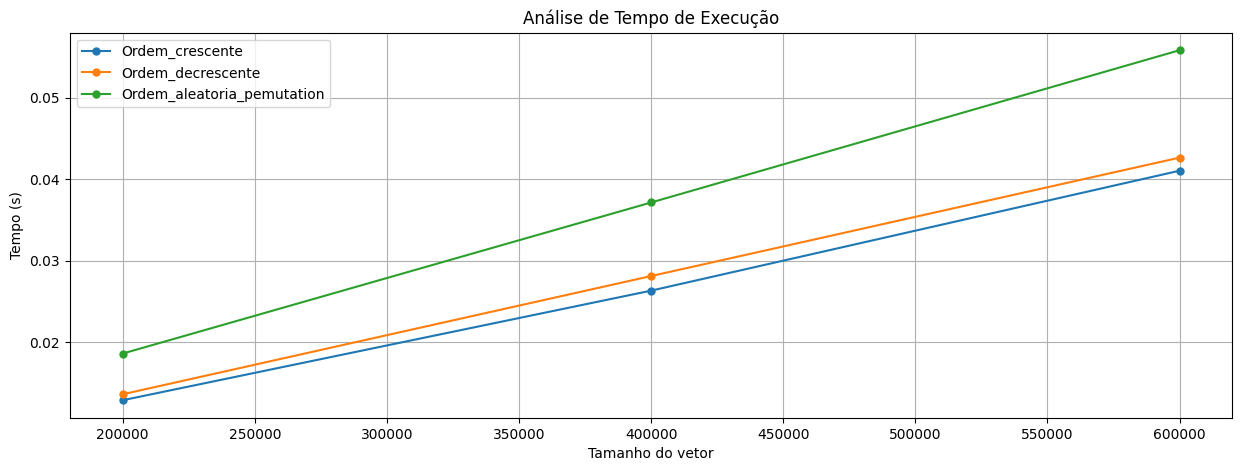

In [140]:
data_block = processing(results_block_sort)
plot_data(data_block)

### Exibindo amostragem do Radix Sort

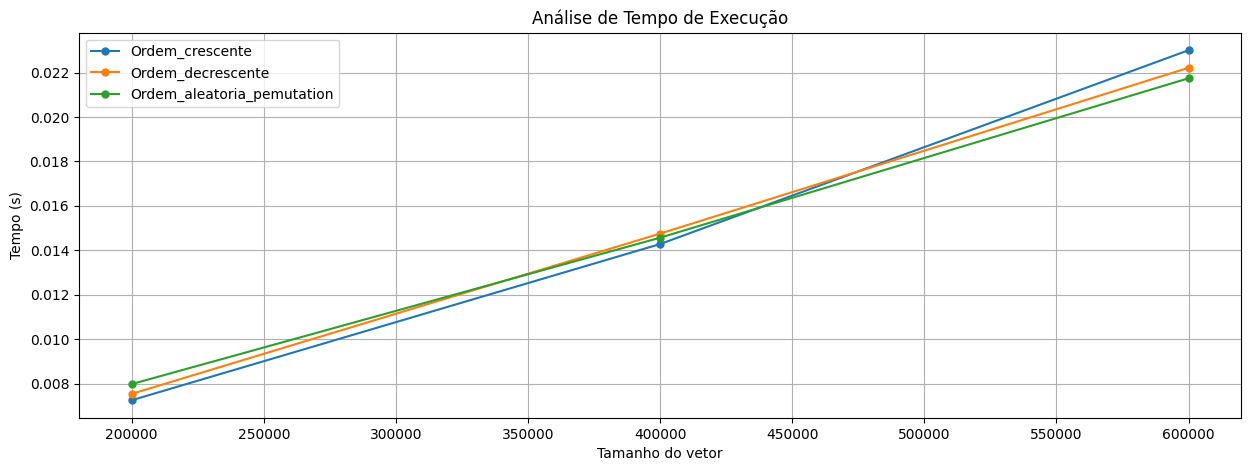

In [141]:
data_radix = processing(results_radix_sort)
plot_data(data_radix)

### Comparação entre os dois algoritmos

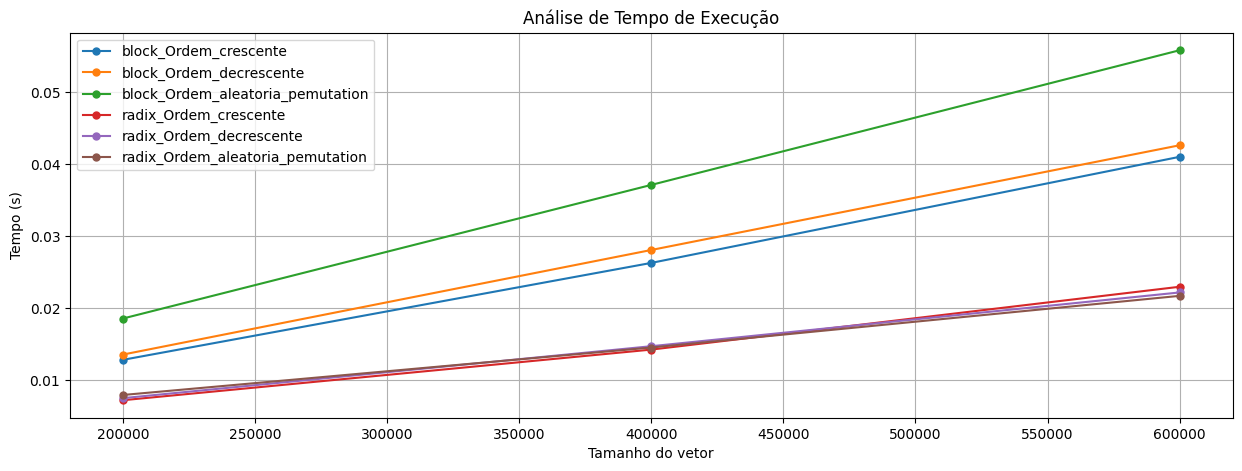

In [142]:
plt.figure(figsize=(15, 5))
plt.title('Análise de Tempo de Execução')
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo (s)')

for type_, data in data_block.items():
    x = list(map(int, data.keys()))
    y = list(map(float, data.values()))
    plt.plot(x, y, label=f"block_{type_}", marker='o', markersize=5)
    
for type_, data in data_radix.items():
    x = list(map(int, data.keys()))
    y = list(map(float, data.values()))
    plt.plot(x, y, label=f"radix_{type_}", marker='o', markersize=5)
    
plt.legend()
plt.grid()
plt.show()
